Intro intro hi hallo *add information later

Leading question:  

Find out, if there might be a difference in salary depending on an employee's gender and/or minority affiliation. What role does the job category play?

Steps we think we should do(*brainstorming):
- load data
- get a feeling about the data (quick EDA)
- data cleaning 
- train linear regression (looking for gender / minories)
- create some random plots showing the gender distribution
- create pairplots
- data cleaning again
- outlier detection

- split the data
- check different metrics (e.g. RMSE*,MSE,R2*,adj.R2,MAPE,MAE)

- figure out our target(salary!) / our features
- correlation matrix 

Steps we think we should do(*in sequence? NO ITERATIVELY):
- load data
- get a feeling about the data (quick EDA, pairplots, Correlations)
- data cleaning / outlier detection (if necessary) 
- select which features to use
- train/test splitting
- train linear regression (looking for gender / minories)
- check different metrics (RMSE,R2)
- tweak our model for better results (feature engineering)
- analyse based on LR model whats going on
- show this in plots/other convincing form to make our point
- error analysis (paterns in resid, bias/variance etc)

- tweak our model for better generalization (regularization etc)





## Metrics for evaluation
We start with using RMSE and R2 to work on this as sort of a profiling analysis
later, to check how well our model generalizes we are useing RMSE

### imports

In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
plt.rcParams["figure.figsize"] = (7,4)


In [3]:
# Import dataset 
df_salaries = pd.read_csv("data/salaries.asc",sep='\t')
df_salaries.head()

,IDNUMBER,SALARY,LOGSAL,EDUC,SALBEGIN,LOGSALBEGIN,GENDER,MINORITY,JOBCAT
0,1,57000,10.950807,15,27000,10.203592,1,0,3
1,2,40200,10.601622,16,18750,9.838949,1,0,1
2,3,21450,9.973480,12,12000,9.392662,0,0,1
3,4,21900,9.994242,8,13200,9.487972,0,0,1
4,5,45000,10.714418,15,21000,9.952278,1,0,1


#### get a feeling about the data (quick EDA, pairplots, Correlations)


In [6]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDNUMBER     474 non-null    int64  
 1   SALARY       474 non-null    int64  
 2   LOGSAL       474 non-null    float64
 3   EDUC         474 non-null    int64  
 4   SALBEGIN     474 non-null    int64  
 5   LOGSALBEGIN  474 non-null    float64
 6   GENDER       474 non-null    int64  
 7   MINORITY     474 non-null    int64  
 8   JOBCAT       474 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 33.5 KB


In [10]:
print('we have 474 observations of 9 features')
print('we have 2 data types: int and float')
print('we have 0 missing values')
print('it seems that we have categorical data we should deal with')

we have 474 observations of 9 features
we have 2 data types: int and float
we have 0 missing values
it seems that we have categorical data we should deal with


In [5]:
df_salaries.describe()

,IDNUMBER,SALARY,LOGSAL,EDUC,SALBEGIN,LOGSALBEGIN,GENDER,MINORITY,JOBCAT
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,237.500000,34419.567511,10.356793,13.491561,17016.086498,9.669405,0.544304,0.219409,1.411392
std,136.976275,17075.661465,0.397334,2.884846,7870.638154,0.352841,0.498559,0.414284,0.773201
min,1.000000,15750.000000,9.664596,8.000000,9000.000000,9.104980,0.000000,0.000000,1.000000
25%,119.250000,24000.000000,10.085809,12.000000,12487.500000,9.432470,0.000000,0.000000,1.000000
50%,237.500000,28875.000000,10.270728,12.000000,15000.000000,9.615805,1.000000,0.000000,1.000000
75%,355.750000,36937.500000,10.516969,15.000000,17490.000000,9.769385,1.000000,0.000000,1.000000
max,474.000000,135000.000000,11.813030,21.000000,79980.000000,11.289532,1.000000,1.000000,3.000000


We already see there is quite a large spread in Salary

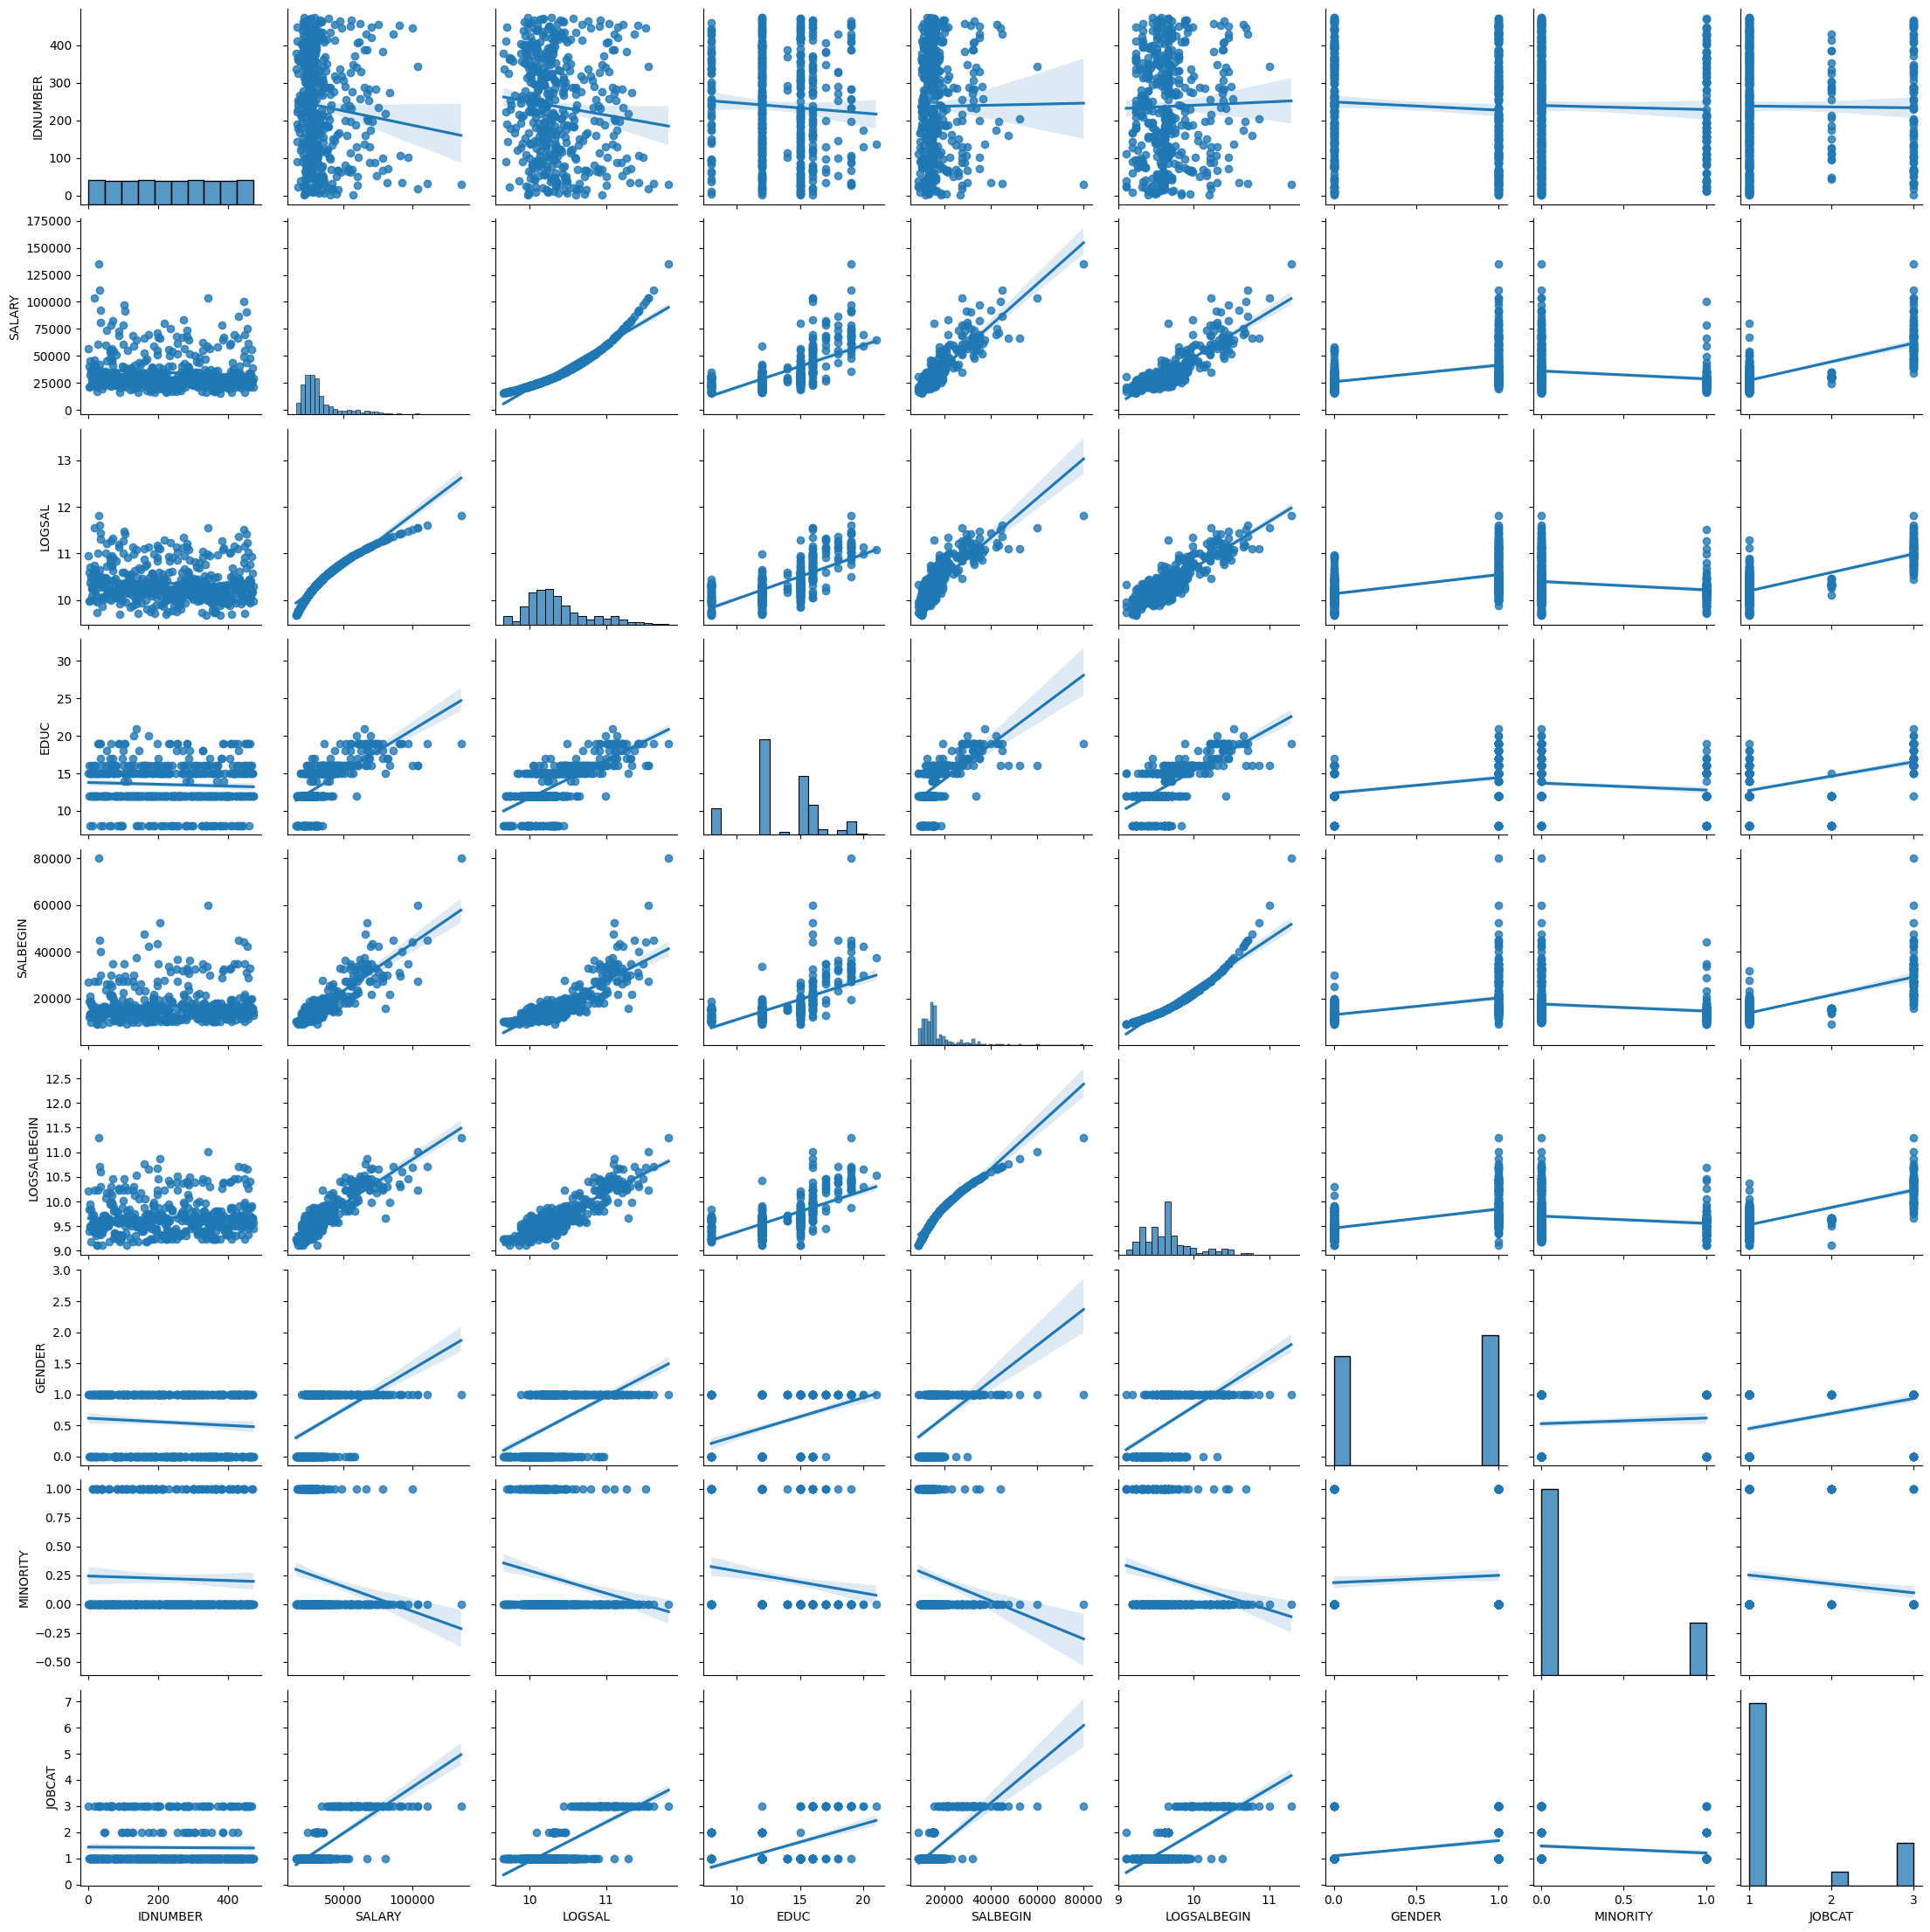

In [12]:
sns.pairplot(df_salaries,kind='reg')

Some findings:

- no impact of ID
- problem with LOGSAL 

-salbegin / logsalbegin is to showing a promising correlation
We have some categorical features that we might have to deal with


Plot the correlation matrix!

In [17]:
df_salaries.corr().SALARY

IDNUMBER      -0.095544
SALARY         1.000000
LOGSAL         0.966290
EDUC           0.660559
SALBEGIN       0.880117
LOGSALBEGIN    0.874655
GENDER         0.449923
MINORITY      -0.177337
JOBCAT         0.780115
Name: SALARY, dtype: float64

Linear Regression

In [18]:
df_salaries

,IDNUMBER,SALARY,LOGSAL,EDUC,SALBEGIN,LOGSALBEGIN,GENDER,MINORITY,JOBCAT
0,1,57000,10.950807,15,27000,10.203592,1,0,3
1,2,40200,10.601622,16,18750,9.838949,1,0,1
2,3,21450,9.973480,12,12000,9.392662,0,0,1
3,4,21900,9.994242,8,13200,9.487972,0,0,1
4,5,45000,10.714418,15,21000,9.952278,1,0,1
...,...,...,...,...,...,...,...,...,...
469,470,26250,10.175421,12,15750,9.664596,1,1,1
470,471,26400,10.181119,15,15750,9.664596,1,1,1
471,472,39150,10.575156,15,15750,9.664596,1,0,1
472,473,21450,9.973480,12,12750,9.453287,0,0,1


In [19]:
y=df_salaries.SALARY

In [21]:
cols=df_salaries.columns
cols

Index(['IDNUMBER', 'SALARY', 'LOGSAL', 'EDUC', 'SALBEGIN', 'LOGSALBEGIN',
       'GENDER', 'MINORITY', 'JOBCAT'],
      dtype='object')

In [23]:
X=df_salaries[['EDUC', 'LOGSALBEGIN',
       'GENDER', 'MINORITY', 'JOBCAT']]